# Exercise - Encoder Decoder Transformer
> "This exercise guides you to a full implementation of a transformer with Pytorch and HuggingFace."

- toc: false
- badges: true
- comments: true
- categories: [Attention is all you need, Transformer, Pytorch, NLP, Coding Exercise]
- image: images/coding.png


"This exercise guides you to a [full implementation of a transformer](https://arxiv.org/pdf/1706.03762.pdf) with Pytorch and HuggingFace"

In [ ]:
#hide
!pip install transformers 

# Imports

In [18]:
from transformers import AutoTokenizer
from transformers import AutoModel
from transformers import AutoConfig

from torch import nn
import torch.nn.functional as F
import torch

from math import sqrt

# Tokenizer 

Exercise:
- Load the tokenizer for `bert-base-uncased`
- Print the `input ids` of the text:  "time flies like an arrow"



## Your Code 

## Solution

In [22]:
#collapse-hide
#collapse-output
model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
text = "time flies like an arrow"

inputs = tokenizer(text, return_tensors="pt", add_special_tokens=False)
inputs.input_ids

tensor([[ 2051, 10029,  2066,  2019,  8612]])

# Model

Exercise:
- Load the pretrained model 
- Take a look at the architecture

## Your Code 

## Solution

In [7]:
#collapse-hide
#collapse-output
model = AutoModel.from_pretrained(model_ckpt)
model

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

# Config

Exercise:
- Load the configuration file 
- Take a look at the `config object` 
- Find the `hidden size` of the model

## Your Code 

## Solution

In [9]:
#collapse-hide
config = AutoConfig.from_pretrained(model_ckpt)
config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.20.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

# Self Attention

Exercise:
- Write the `scaled_dot_product_attention`function 


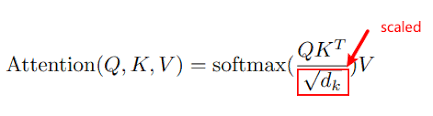

## Your Code 

In [ ]:
def scaled_dot_product_attention():
  """Example function with types documented in the docstring.

  Args:
      query (torch.tensor): Query tensor.
      key (torch.tensor): Key tensor.
      value (torch.tensor): Value tensor.

  Returns:
      attention (torch.tensor): Scaled dot product attention.
  """
  pass

## Solution

In [ ]:
#collapse-hide
def scaled_dot_product_attention(query, key, value):
  """Example function with types documented in the docstring.

  Args:
      query (torch.tensor): Query tensor.
      key (torch.tensor): Key tensor.
      value (torch.tensor): Value tensor.

  Returns:
      attention (torch.tensor): Scaled dot product attention.

  """
  dim_k = query.size(-1)
  scores = torch.bmm(query, key.transpose(1, 2)) / sqrt(dim_k)
  weights = F.softmax(scores, dim=-1)
  return torch.bmm(weights, value)

# Attention Head

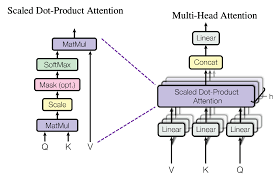

## Your Code 

In [ ]:
#collapse-hide
class AttentionHead(nn.Module):
  """
  Implements a single attention head. Multiple heads can be used 
  in Multi-Head Attention.
  """
  
  def __init__(self):
    pass

  def forward(self):
    pass

## Solution

In [ ]:
#collapse-hide
class AttentionHead(nn.Module):
  """
  Implements a single attention head. Multiple heads can be used 
  in Multi-Head Attention.
  """
  
  def __init__(self, embed_dim, head_dim):
    super().__init__()
    self.q = nn.Linear(embed_dim, head_dim)
    self.k = nn.Linear(embed_dim, head_dim)
    self.v = nn.Linear(embed_dim, head_dim)
  
  def forward(self, hidden_state):
    attn_outputs = scaled_dot_product_attention(
        self.q(hidden_state), 
        self.k(hidden_state), 
        self.v(hidden_state))
    return attn_outputs

# Multi-Head Attention

## Your Code 

In [ ]:
#collapse-hide
class MultiHeadAttention(nn.Module):
  """Creates Multi-Head Attention Layer by
  determining embedding dimension, number of heads and 
  head dimension from the config file.
  """
  def __init__(self):
    pass
  
  def forward(self):
    pass

## Solution

In [ ]:
#collapse-hide
class MultiHeadAttention(nn.Module):
  """Creates Multi-Head Attention Layer by
  determining embedding dimension, number of heads and 
  head dimension from the config file.
  """
  def __init__(self, config):
    super().__init__()
    embed_dim = config.hidden_size
    num_heads = config.num_attention_heads
    head_dim = embed_dim // num_heads
    self.heads = nn.ModuleList(
        [AttentionHead(embed_dim, head_dim) for _ in range(num_heads)]
        )
    self.output_linear = nn.Linear(embed_dim, embed_dim)
  
  def forward(self, hidden_state):
    x = torch.cat([h(hidden_state) for h in self.heads], dim=-1)
    x = self.output_linear(x)
    return x

# Feed Forward 

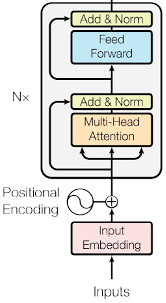

## Your Code 

In [ ]:
class FeedForward(nn.Module):
  """Implements feed forward layer with GeLU
  and Dropout. Contains 2 Linear layers.
  """
  def __init__(self):
    pass
  def forward(self):
    pass

## Solution

In [14]:
#collapse-hide
class FeedForward(nn.Module):
  """Implements feed forward layer with GeLU
  and Dropout. Contains 2 Linear layers.
  """
  def __init__(self, config):
    super().__init__()
    self.linear_1 = nn.Linear(config.hidden_size, config.intermediate_size)
    self.linear_2 = nn.Linear(config.intermediate_size, config.hidden_size)
    self.gelu = nn.GELU()
    self.dropout = nn.Dropout(config.hidden_dropout_prob)

  def forward(self, x):
    x = self.linear_1(x)
    x = self.gelu(x)
    x = self.linear_2(x)
    x = self.dropout(x)
    return x

# Encoder Layer

## Your Code 

In [ ]:
class TransformerEncoderLayer(nn.Module):
  """ Combines Multi-Head Attention with Layer Normalization, 
  Feed Forward Layer and skip connections to obtain an Encoder Layer.
  """
  def __init__(self):
    pass
  def forward(self):
    pass

## Solution

In [20]:
#collapse-hide
class TransformerEncoderLayer(nn.Module):
  """ Combines Multi-Head Attention with Layer Normalization, 
  Feed Forward Layer and skip connections to obtain an Encoder Layer.
  """
  def __init__(self, config):
    super().__init__()
    self.layer_norm_1 = nn.LayerNorm(config.hidden_size)
    self.layer_norm_2 = nn.LayerNorm(config.hidden_size)
    self.attention = MultiHeadAttention(config)
    self.feed_forward = FeedForward(config)
  
  def forward(self, x):
    # Apply layer normalization and then copy input into query, key, value
    hidden_state = self.layer_norm_1(x)
    # Apply attention with a skip connection
    x = x + self.attention(hidden_state)
    # Apply feed-forward layer with a skip connection
    x = x + self.feed_forward(self.layer_norm_2(x))
    return x

# Embeddings

## Your Code 

In [ ]:
#collapse-hide
class Embeddings(nn.Module):
  """Implements token embeddings and positional embbeddings. 
  """
  def __init__(self):
    pass
  
  def forward(self):
    pass

## Solution

In [ ]:
#collapse-hide
class Embeddings(nn.Module):
  """Implements token embeddings and positional embbeddings. 
  """
  def __init__(self, config):
    super().__init__()
    self.token_embeddings = nn.Embedding(config.vocab_size,
    config.hidden_size)
    self.position_embeddings = nn.Embedding(config.max_position_embeddings,
    config.hidden_size)
    self.layer_norm = nn.LayerNorm(config.hidden_size, eps=1e-12)
    self.dropout = nn.Dropout()
  
  def forward(self, input_ids):
    # Create position IDs for input sequence
    seq_length = input_ids.size(1)
    position_ids = torch.arange(seq_length, dtype=torch.long).unsqueeze(0)
    # Create token and position embeddings
    token_embeddings = self.token_embeddings(input_ids)
    position_embeddings = self.position_embeddings(position_ids)
    # Combine token and position embeddings
    embeddings = token_embeddings + position_embeddings
    embeddings = self.layer_norm(embeddings)
    embeddings = self.dropout(embeddings)
    return embeddings

# Transformer Encoder

## Your Code 

In [ ]:
class TransformerEncoder(nn.Module):
  """Combines the Embedding layer and multiple encoder layers  
   to obtain full transformer encoder.
  """  
  def __init__(self):
    pass
  def forward(self):
    pass

## Solution

In [ ]:
#collapse-hide
class TransformerEncoder(nn.Module):
  """Combines the Embedding layer and multiple encoder layers  
   to obtain full transformer encoder.
  """  
  def __init__(self, config):
    super().__init__()
    self.embeddings = Embeddings(config)
    self.layers = nn.ModuleList(
        [TransformerEncoderLayer(config)
        for _ in range(config.num_hidden_layers)])
  
  def forward(self, x):
    x = self.embeddings(x)
    for layer in self.layers:
      x = layer(x)
    return x

# Classification Head

## Your Code 

In [ ]:
#collapse-hide
class TransformerForSequenceClassification(nn.Module):
  
  def __init__(self):
    pass
  def forward(self):
    pass

## Solution

In [ ]:
#collapse-hide
class TransformerForSequenceClassification(nn.Module):
  
  def __init__(self, config):
    super().__init__()
    self.encoder = TransformerEncoder(config)
    self.dropout = nn.Dropout(config.hidden_dropout_prob)
    self.classifier = nn.Linear(config.hidden_size, config.num_labels)
  
  def forward(self, x):
    x = self.encoder(x)[:, 0, :] # select hidden state of [CLS] token
    x = self.dropout(x)
    x = self.classifier(x)
    return x

# Masked Attention

Exercise:
- Change the `scaled_dot_product_attention` such that it can incorporate a mask. 

## Your Code 

In [ ]:
#collapse-hide
def scaled_dot_product_attention():
  pass

## Solution

In [21]:
#collapse-hide
def scaled_dot_product_attention(query, key, value, mask=None):
  dim_k = query.size(-1)
  scores = torch.bmm(query, key.transpose(1, 2)) / sqrt(dim_k)
  if mask is not None:
    scores = scores.masked_fill(mask == 0, float("-inf"))
  weights = F.softmax(scores, dim=-1)
  return weights.bmm(value)

# Putting it all together: Encoder-Decoder Transformer

## Your Code 

## Solution

In [ ]:
#collapse-hide